In [403]:
import numpy as np
from matplotlib import pyplot as plt
import json, os

In [485]:
run = 1
Gamma0 = 5.00
rhoseed = 0.16#0.9#0.16
Pii     = 0.15

lp = 0
lq = 0
ld = 2
lc = 5
dr = 0.05

datadir = '../../data/model_Q_rho_dry_tests/gamma0_{:1.1f}_rhoseed_{:1.2f}_pi_{:1.1f}/lp_{:1.2f}_lq_{:1.2f}_ld_{:1.2f}_lc_{:1.2f}/dr_{:1.2f}/run_{:d}/'.format(Gamma0, rhoseed, Pii, lp, lq, ld, lc, dr, run)

savedir = datadir+'videos/'

if not os.path.isdir(savedir):
    os.mkdir(savedir)

with open(datadir+'parameters.json') as jsonFile:
    parameters = json.load(jsonFile)

T         = parameters["T"]        # final time
dt_dump   = parameters["dt_dump"]
n_steps   = int(parameters["n_steps"])  # number of time steps
n_dump = int(T/dt_dump); dn_dump = int(n_steps/n_dump)
K         = parameters["K"]        # elastic constant, sets diffusion lengthscale of S with Gamma0
lambd     = parameters["lambda"]
p0bygamma = parameters["p0bygamma"]       # pressure when cells are close packed, should be very high
r_p       = parameters["r_p"]      # rate of pressure growth equal to rate of growth of cells
rho_in    = parameters["rho_in"]   # isotropic to nematic transition density, or "onset of order in the paper"
rhoisoend = parameters["rhoisoend"] /rho_in   # jamming density
rhonemend = parameters["rhonemend"] /rho_in   # jamming density max for nematic substrate
mx        = np.int32(parameters["mx"])
my        = np.int32(parameters["my"])

#setup a meshgrid
tol = 0.001

x   = np.linspace(0+tol, 1-tol, mx)
y   = np.linspace(0+tol, 1-tol, my)
xv, yv  = np.meshgrid(x,y)

dx = 1/mx; dy = 1/my

times = np.arange(0, n_dump, 1)*dt_dump

In [489]:
n_dump = 280; times = np.arange(0, n_dump, 1)*dt_dump
rho = np.zeros([n_dump, mx, my])
#v   = np.zeros([ndump, mx, my, 2])
Q   = np.zeros([n_dump, mx, my, 2])
curldivQ = np.zeros([n_dump, mx, my])

i=0
for n in np.arange(n_dump):
    rho[i] += np.loadtxt(datadir+'rho.csv.{:d}'.format(n), delimiter=',')
    curldivQ[i] += np.loadtxt(datadir+'curldivQ.csv.{:d}'.format(n), delimiter=',')
    Q[i,:,:,0] += np.loadtxt(datadir+'Qxx.csv.{:d}'.format(n), delimiter=',')
    Q[i,:,:,1] += np.loadtxt(datadir+'Qxy.csv.{:d}'.format(n), delimiter=',')
    i+=1

S     = np.sqrt(2*(np.square(Q[...,0])+np.square(Q[...,1])))
theta = np.arctan2(Q[...,1], Q[...,0])/2
nx    = np.cos(theta)
ny    = np.sin(theta)

0.11568032095600059 0.022725757270629067


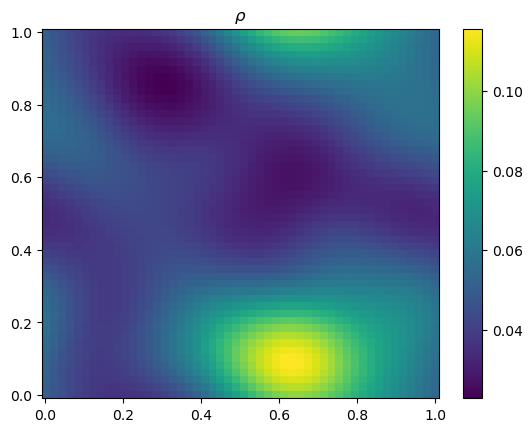

In [490]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

fig, ax=plt.subplots()
#colors = ['#c1272d', '#eecc16','#008176','#0000a7']
#cmap1 = LinearSegmentedColormap.from_list("mycmap", colors)
field = rho
i=1
fmax = np.max(field[i]); fmin=np.min(field[i]); print(fmax, fmin)
#ctrf = [ax.pcolormesh(xv, yv, S_sqrd[i], cmap=cmap1, vmin=0, vmax=Smax), ax.quiver(xv,yv,nx[i],ny[i], color='w')]
ctrf = [ax.pcolormesh(xv, yv, field[i], vmin=fmin, vmax=fmax)]
plt.colorbar(ctrf[0])
plt.title(r"$\rho$")
plt.show()

0.05000231094181764


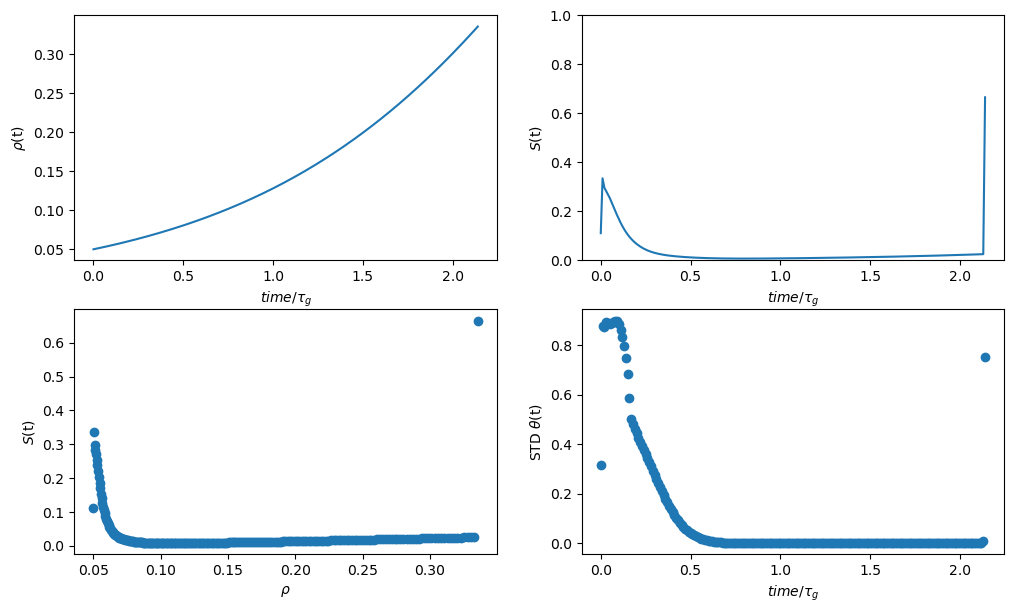

In [491]:
Rho = np.sum(np.sum(rho, axis=2), axis=1)*dx*dy #integrated rho over all space divided by unit area
print(Rho[0])
Ssum= np.sum(np.sum(S, axis=2), axis=1)*dx*dy
thetaavg = np.std(theta.reshape(np.size(times), mx*my), axis=1)
fig, ax = plt.subplots(figsize=(12,7), ncols=2, nrows=2)
ax[0,0].plot(times, Rho); ax[0,0].set_xlabel(r'$time/\tau_g$'); ax[0,0].set_ylabel(r'$\rho$(t)');
ax[0,1].plot(times, Ssum); ax[0,1].set_xlabel(r'$time/\tau_g$'); ax[0,1].set_ylabel(r'$S$(t)');
ax[0,1].set_ylim(0,1);
ax[1,0].scatter(Rho, Ssum); ax[1,0].set_xlabel(r'$\rho$'); ax[1,0].set_ylabel(r'$S$(t)');
ax[1,1].scatter(times, thetaavg); ax[1,1].set_xlabel(r'$time/\tau_g$'); ax[1,1].set_ylabel(r'STD $\theta$(t)');

0.26955018383936186 0.00018014570454075006


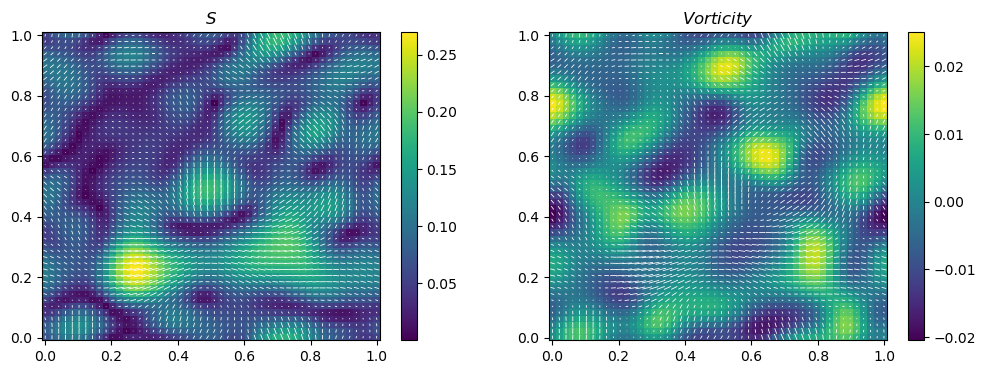

In [421]:
fig, ax=plt.subplots(figsize=(12,4),ncols=2)
#colors = ['#c1272d', '#eecc16','#008176','#0000a7']
#cmap1 = LinearSegmentedColormap.from_list("mycmap", colors)

n=200


Qxx = np.loadtxt(datadir+'Qxx.csv.{:d}'.format(n), delimiter=',')
Qxy = np.loadtxt(datadir+'Qxy.csv.{:d}'.format(n), delimiter=',')
curldivQ = np.loadtxt(datadir+'curldivQ.csv.{:d}'.format(n), delimiter=',')
S = np.sqrt(Qxx**2+Qxy**2)
theta = np.arctan2(Qxy, Qxx)/2
nx    = np.cos(theta)
ny    = np.sin(theta)
print(np.max(S), np.min(S))

plot1 = [ax[0].pcolormesh(xv, yv, S, cmap='viridis', vmin=np.min(S), vmax=np.max(S)), ax[0].quiver(xv,yv,S*nx,S*ny, color='w', pivot='middle', headlength=0, headaxislength=0)]
plot2 = [ax[1].pcolormesh(xv, yv, curldivQ, cmap='viridis', vmin=np.min(curldivQ), vmax=np.max(curldivQ)), ax[1].quiver(xv,yv,S*nx,S*ny, color='w', pivot='middle', headlength=0, headaxislength=0)]

fig.colorbar(plot1[0], ax=ax[0])
fig.colorbar(plot2[0], ax=ax[1])
ax[0].set_title(r"$ S $")
ax[1].set_title(r"$ Vorticity $")
plt.show()

0.023124406700354747 -0.013948362544123537
1.044759649387637
0.04169094761704976


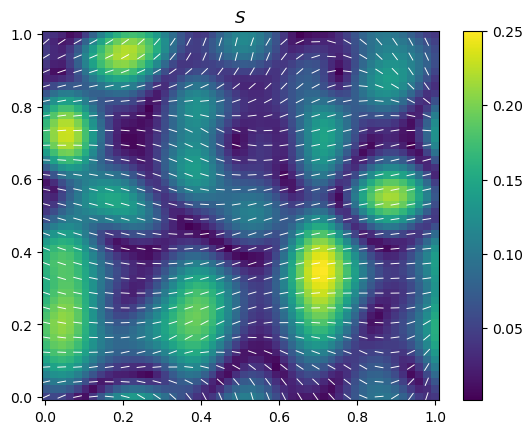

In [327]:
fig, ax=plt.subplots()
#colors = ['#c1272d', '#eecc16','#008176','#0000a7']
#cmap1 = LinearSegmentedColormap.from_list("mycmap", colors)

n=250

charge = np.loadtxt(datadir+'curldivQ.csv.{:d}'.format(n), delimiter=',')
Qxx = np.loadtxt(datadir+'Qxx.csv.{:d}'.format(n), delimiter=',')
Qxy = np.loadtxt(datadir+'Qxy.csv.{:d}'.format(n), delimiter=',')
S = np.sqrt(Qxx**2+Qxy**2)
theta = np.arctan2(Qxy, Qxx)/2
nx    = np.cos(theta)
ny    = np.sin(theta)

print(np.max(charge), np.min(charge))

p_factor = 2
pcharge = pixelate(2*charge/S, p_factor)
print(np.max(pcharge))
p_half_defects = np.where((pcharge)>0.2)
m_half_defects = np.where((-pcharge)>0.2)
#print(p_half_defects, m_half_defects)

pnx = np.cos(pixelate(theta, p_factor))
pny = np.sin(pixelate(theta, p_factor))
print(np.mean(theta))

ix, fx, iy, fy = 0, 50, 0, 50
ctrf = [ax.pcolormesh(xv[ix:fx, iy:fy], yv[ix:fx, iy:fy], (S)[ix:fx, iy:fy], cmap='viridis', vmin=np.min(S), vmax=np.max(S))]
ax.quiver(xv[ix:fx:p_factor, iy:fy:p_factor],yv[ix:fx:p_factor, iy:fy:p_factor], pnx[ix//p_factor:fx//p_factor, iy//p_factor:fy//p_factor], pny[ix//p_factor:fx//p_factor, iy//p_factor:fy//p_factor], color='w', pivot='middle', headlength=0, headaxislength=0)
#ax.scatter(p_half_defects[1]/mx, p_half_defects[0]/my, color='pink')
#ax.scatter(m_half_defects[1]/mx, m_half_defects[0]/my, color='red')
#ctrf = [ax.pcolormesh(xv, yv, rho[i], cmap=cmap1, vmin=np.min(rho), vmax=np.max(rho)), ax.quiver(xv,yv,nx[i],ny[i], color='w', headlength=0, headaxislength=0, width=0.006, pivot='middle')]
#ctrf = [ax.pcolormesh(xv, yv, rho[i]*v[i,:,:,1])]
plt.colorbar(ctrf[0])
plt.title(r"$ S $")
plt.show()

In [299]:
def pixelate(x, gridpoints):
    nx, ny = np.shape(x)
    xpad = np.pad(x, (gridpoints, gridpoints), 'wrap')
    ret = np.zeros(np.shape(x))
    for cx in np.arange(nx):
        for cy in np.arange(ny):
            ret[cx, cy] += np.average(xpad[cx:cx+1+2*gridpoints, cy:cy+1+2*gridpoints])
    return ret

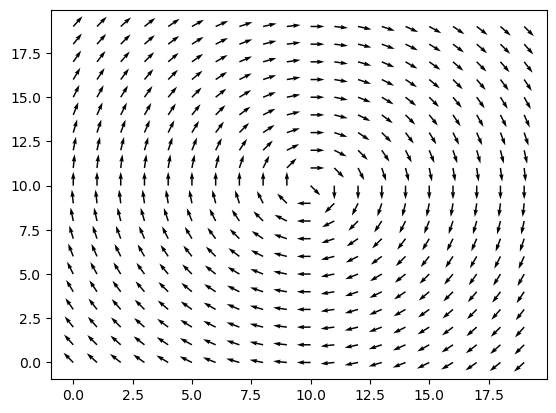

In [30]:
grid_size=np.array([20,20])
dr = np.array([1,1])
tol = 0.001
x   = np.arange(0+tol, grid_size[0]-tol, dr[0])
y   = np.arange(0+tol, grid_size[1]-tol, dr[1])
r   = np.meshgrid(x,y)
cx, cy = 0.5 * grid_size
    
theta = np.arctan2(r[1]-cy,r[0]-cx)
theta = np.where(theta<0, theta+2*np.pi, theta)
theta = theta - np.pi/2

fig, ax = plt.subplots()
ax.quiver(r[0], r[1], np.cos(theta), np.sin(theta))